# Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:

If the goal is prediction, forecasting, or error reduction, linear regression can be used to fit a predictive model to an observed data set of values of the response and explanatory variables. After developing such a model, if additional values of the explanatory variables are collected without an accompanying response value, the fitted model can be used to make a prediction of the response.

If the goal is to explain variation in the response variable that can be attributed to variation in the explanatory variables, linear regression analysis can be applied to quantify the strength of the relationship between the response and the explanatory variables, and in particular to determine whether some explanatory variables may have no linear relationship with the response at all, or to identify which subsets of explanatory variables may contain redundant information about the response.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

In [4]:
from IPython.display import Image
Image(url= "https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png", width=800, height=400)


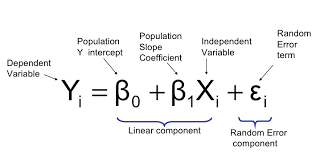

In [7]:
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUAAAACdCAMAAADymVHdAAABAlBMVEX////+/v4AAAD7+/v4+PgjLKa8vNbw8PD8/v/5+fn09PT///3s7Ozf39/t7e20tLTW1tZvb2/i4uK+vr5WVlbZ2dnFxcWZmZlmZmYvLy9tbW3Pz8+5ubmQkJBzc3NPT0+mpqaBgYFbW1tISEiVlZWsrKwmJiYNDQ04ODhAQECDg4NhYWEhISEYGBh5eXlKTrWandwAAKHv8fuoq85gZaiFhb1ESZ3W1+wAAJi2uOUUG6hRVLZxdseAf74GEKSoqt2NkdPLzuy6vOCanNA8P6/k5fmAhMwbHp5jY7QhLKxAQrBvc8pZXrs0Nq6RldtWXMYsM7rJzO8bIriYmcawr8jCw9VQxT2FAAAXaUlEQVR4nO1dCYOjyHV+VWAzokEgblRcEkItkMR6Z2OvPXbsvZ2NdxPHjv//X8krEGod6EI93T0bvumROOri49U7iioE0KNHjx49evTo0aNHjx49evTo0aNHjx49evTo0aNHjx49evTo0aPHJwRC6v+7Rzheqz2fGsjOZ3OIAIGewGshSJK0dwCpk986fUe9pjm69/0y0P2xN3f2j3lSe9o3g42KOSCRNCdftC1sDKA84ncggqoEMlJqL4eg4q6hmETV32JvRo6CILD3ySIgsPpbBia/WFvYVDFmJUxCbQ3WNPEhjAoqa2myErxluJiMtRdryk2giRu7B8fkvP5eQKK8WEPYfOKPCKhMeySWBJayALDEuQKhNrKBglq+WFNuAfGRrzU400IYJmUhyC4omRjjgWjo0EwbwswKwNSW7sfuQdiFBd+GZWjMBSRwacwBYnEFoGmRCiuw3yaBQM1gGSoLORkrVNQiKQV9LMTyFMwxPOJlzAoxZTOPxOwjM8iWqPUoyZlG5ViCeDgJMyq6kTmXl1wC9eijVt8ZNEkc0GYgpvYS5FSJsaVCDEHhjZBAT0kNMF3XAdf8yARK/A45ipIwW2IDYCIEJhPAzBSuiR2Q9Y9UMZGGx8ZeEJutJ1eq7foJ+PzLmYBkGTEoS1R/zkiw9KVoexWBng2JNqsIbIG89X9F4UT7hMF+/advw5mw42PeO/1xGs+V3Vrw2wmrLTGE8fBMA9DRp/xbWE7nzFhbPoPFMh4JuewXUwvmoaeqq2kKhQlh0FaApzY1FmxbT8XDdkvLdhpQnGSpOv4qgQfXHUEEiqaAZJgGfoCkOAUMNR2chaIKoAcDsBWt1SNpGown1WW1J28PAAzg6UArpoYxDAzMy0oGhiaBYgR4M4eaAUPFxE6nmEkGksbbhLv2o3HKvXw9J49ZshSGuq/NVUbNlJkzMEMWKrkTB+bCiCWXO1WLUbJqyfzkMxMwJlu5qaNQ0shFfaDtyqdGmGsr2YkTqrPUyaWAmgvbWJiWHayzBTMW2VpTcFdnNEsdfW2f9M+JiDilBz4mdOp5E4gYmKVegj12XHBcVgBzvHA4hamMnTRyYgU12hE2IyDdBz2mSmhCqS8V/IhCzUuCEBXqLNKKCd7IIJkxyDTXQ5OELcJzi9Pxjb2YWvGOon0xkeRdGGBsAJuwGSicwMB1QmaZWahsCAw5geuWzJtQrnPlGwItFSJ9nDHH0BL0eIuQOTZumcnMRALDgiFCTqB/Ws3hdQgCiJIto70ljgyCZL+IQDKLM2DGTqqzR3PqGL6Tu04RjOx0Iq9VSyomwQJyBWhLZiSQmTKIRsfKLQMJjJjpBVQ3LZaqgW/Gup6zqaPxG6nm5kpTF44X1BJIT0e0zFJ1nZhrT6NjfTVb6Tadqh2bdRO4/4Q86JkNrETDASxDza6CkykMHKYPMI4YcrfKac3ujcO1YY86Vs5EVQEbi9dsCStWQSs0DK3tTEdzwv/UTFdATRhgixQV9cpJAvXVpIwkswRzArMEdE9NOzaqO9D23gruxjAH40y7dImYzVyMRku3e9fJDuPqq8FHY4BLqenCxIGhp447t6Irntzn6zGj6IDYpfyohqVIbbcUc8PsHnZ2aUINlptBoCKBwQxYbI8Sddm5FS8GQgQQzNQ1JhjMAR2gOl0zv5ikd5jArlmVLEkSZqA7ydUQqtZhu855dsjbD27F9gKm7XBp/dcGFTlTYmOCoYuwGMQAvj0VlNaoowUDblOfahXrigeb7Tst/EuhSFD51eoiqMcchxk0wVQzZl9fxiA7yIvnyjTydXUEaZSbIo1yB5bRNLmybpMr3aiylYQHhFU9oifg91QAuMPBfEEQqgi0lsDhUBbR6AVTEVQeRhkKGNxBYUMYSDqayfRwfBQvT1JFjAKAGBIMY/5chxhXD0OLvgjSAivgtakSMqkzEC3eCXMBbP3Fnwt0ApuWG22RJdnKpaqbKjNvNgLf0lyrLGDuxkylrs/MBdvP+vRMpPqWvFuvGGt2NcjdMgIaawuwwtIDfzmKIIdJVJS39ODXCONqRI29zzL0IrIMnRLqMCrnVfimZh5LYmMKRi57Bzk3Qe9OnLsX15GDpMewx+CLhBlZzP30HJihrWAhQi6mIm+DcD2DxpEP9kJjMwQSdyM3SKAGWmaXfJw5E2MJVtiwZGQGJn+isJDaCNz93uOMtKfdR8wikK2ZaWGkKOQQh2wOU4JVpcOqDddfR+jrQhgZGL5kplYa7mxwOc9zAC/LnTUEJlmGLBq5EGcshVyCONM8ZW2HifrIykRaHIZsfLxuGUk7ZA1GiWm5lV0Qw52Udrs4ZNQGdSHNfJRAwZfXQ5cC1bQcFrDQnPQGK4x3wtPkOcQzdeoy6rjJtTnvhm1vNlQEfhAMpBJXARNNQ5KgQZkFYE8TNNHmsWtVFkNzjj2t8T2yCVABgzNUSQKmFioCUD21RdIImVt8FjKHaEAC3NLNAYbBApgguol0A4F6CevJJLctGZYGyjO7Pax6Zuw1XffaroWAOOcnRTu2XJCmyxDSOKRuog8tLxM8SKZLexiNUlRnyalqnsnQsgn4hqAJNYErTuBrWfDN6OfTEDnuiErtFB6k3AyGwUKF1Bhr4DlBAnModMsGV8qlXDby4VpAE/R45rHADoeV09nY9psIUCjL0smUKx7LQIFHQl/NBapDDzCN3bkbOw71TkLuxQFTcz5muIiiyNESvPuFzQcPxVSfl1GB7ClLTuCJsXhn/wzZuW03QUafEm+zSHiAg9pHuFAAAcNx7K2YNMPmzQewp7H1jSa6FYInX7gKPGlpgkGlVBWs4SgA10BHaA0T3dIHloISCMNQsTiBJ3Qg1vJauopAOA09v9V95Fe92m4Bdww6lA9SdKEXIL1yNE0xgLemGchLLwQzAFR9tmx5phCBNvXsYYEsQjE5VUZ44sTHBqmeFCYz0McukbUwFMGI8CNxIwXUEj0BoyxEIXMjw6ZdRtn4KOsFPbL1A7cfsNfNn0YmyMku+WoEotZBx0KNUVVrhUTVwINHxfGAMnMKC2OGrpSqWwJ1nCn4HSZJVb3f4cxfFN9j6jhZQ32Xs5Nhwf0EdrQVpCJQnwb5ZBJLFgix6ReljzYQNVKEhlGZF2Wu+IDnFh3jRHSy7xhUm9jXWNJ7Cdyq/ZszVl14kjkeUYJhCgNLX8BQqwiUU4xclXwgayIes8DvbtAndzyYiZRrxPdeCeQjit18yXAVL8YgTEepOVwt0wDGy6mL5g6lbrK0fCinS1dYg5KC1XGMnbcr6jrIjr7E6Ip49Bl0YCl168ZEGFRdUxFAsWSu5hS5CpsEfkzY2SV3zBWux6i6ibA0hotLDe4isNKshX054dkyEErLc8Xn8sONsvu4pnp6NlCD+wjEwpPWeV+3lQKNA092j+3ZwO6lg5N0z++4l8i/k0DA2LFj3t2txh17cstOPgbqAPf04+wLIJDtzk5rTXKfDmTdsw+5b69vn/NkavNFQOPbzxhKF2r3Xuyy83mRwDtaqnDz2DU/H970GAjcVBBBlypbMWFiPVtRfk4KPUHpXFphnM2pFHcshRgshTsuMwhBXgBbeh6Ey8i19ak3hjBelhAyaTounlEE5ZXVqZ1Vnkl6zs2w6KxrqwCW4l1isgY+hUkC34gymOimBLlSJFA6oT7SYGQ+zXu9Vx/qj7SznAxyek6HGt1LhknXWWFNfjaVwFkUuTFSodAZbimFDloS6nFUltVA26xSh/cblKDrkhm8e9lZM951DVYdZ951YWpeVpqQqmMVYy5fEnyUQJLaoV5q4KrVcJMbabc8Wmhtattg6vWZ4awV6f7wMdPukwweZunoaY0mru0qkBjOuAjtbOK5kNmD8XirWlhR3LtG4vRo1HV5z5LUseBqpOh+Q3lVAcMsygQYNDy0Pwa/oq7Tk4zONZBA84xlp6T9JyEn5qCfgzp5Jjdjr+bmWVC1vZdMn4RW0nBHnpJfX0/3Bm7yH4207jfjtkdIVvRcbtrufWyWF5Cd8ASaqEShlTVUFGV3fEVQhsNrq1KDzL55WAJrNsyMDQ+uF+tVdpJgq24qNaDWHVqlG0TdkLnpojTfOTqm1433Y0icUo5QuLHhulXlK+X9TvxIabC1MAmWe5NAJdnLrUTeAzYy5ZQ1HJiUxtflROKpF61pdetvqA5roNPSp3R3WByrV/G4tOk2etWKl5WnjsDWGthyY9Nc+bG6iiuA1+jx4VHkMbvlUoeUpryGYE/GSC111b0jIFK6lm5TyK82b3C35Qiv6kfXZJxQ2mTJz6fcB1ZW69iQF7Bj/jEOq7QHbkwpZbcJ4HOONXUAKqWkohK71+jKpqR0s2BZo21LltqBRY+bm4UiLO6TJKH467VWvjoc7uI/PD/qToxd55GurnycIMzpZuDNpfNzWSbpro0nSPxmUqFD6YEvyA/5BNgZNbxfWoVglKblvTHcfag6MZoCKCvH5qqbiVzXxpqk9Oy0p9Fqn0Cfbp42eHS6f9VYL+qFAtAuyadKHM0PCBTiyqTT9Grf6yMAG4vNMPmtn7Sca93bECjaUy40ZwiMDi65JlA0Srpueci5QAt9TgEeEEi4Jp2Ybsqb/6rATrwe5HR+dYaKQCP3qT877we2ETjIF3RdSC2ai/sy5xTgPoGEe4/VPc9OTHh9OWAnXtCWtY+D2N/FqhlwqwhEO0BX/CHijQSKlSPN2rQFGpD2+VE1DruwQKlW1/7q6x+w59CWJ2ZCZO0ibgKsugvLRhBX2U6XG833H6ZXXVg2HHSYWt47Is/p2UjooDRC1pXy3gtUXwkYGd+yHHRrRLjib38Bh8IheXOj2miU/NaIuIfMk9oVnPOOcF1p/CEm9hw3e7n3IZ0CAeGRHi5aOIeGQMy4onnb3U/oHhrPxKfNKhSU3cPOinkKNGXr4+Ug7aWROqJ8bQtStWRA6S3LQZHAyg9EISgobZMA20040nX17TbrDf3tfcoqc7vbBrVSgOhMjY8IbC+NoBuPMpseLJh6BRCujpe7+82Gqe2h0eFIYLSJoPAa1CbDsSqP5vti5m+kpxoxeJIcnk9EDxAtkuBvLcMR9ksjXPEslO3eq2JLIOGzcret4Re1i2ZyGw9a6gFsdMUeq4fEamK2hDHHVvhxs4pVq6w+bjhOPQbj1RFlZdyr98GoyWEfP7TCtRQ3I+MsecVXfO4QuMx3JNBQ99BcERJI7XqsNqd5rYzyNT1+o9gxgTSoaoERj+WqjhtWl49qblqb0xk3aHgoO3rCeUhgwtUHr9KoA5m3QaCh7g6THGBzgBM4rwa+krrD2TQDoTyee99CYC3GDq2J0zbuk02r0YVKCeS00rASO6z+0JFmG2copHxKi6K/mju4Y0T4IP/ldiCBaEVDU/PqMBom8+opwdHa9GMCF2s6CQL0flaVuNPJnIcefER6awtQtfEd+WgSyGFp3H1duCHmXeAJ6eSLoD46KiNibXa8K9b0IYGJWevHakE55CP+6R8F095BN/RpaftVPquKhccM5twhsijdmVeF7h0donAedmGPHsTCske3DxbQH3i1LowVq6qx2RxdMUhf+YGyGRZJ3d9JHZPm1mFCRd0vqoqFnVnh2s0zQ4FL4MB+0q+VYlRVqYXA/dKq/m5n4cysxyVC+jZeCTA6YuEYT5EIB3/tHZ97CulhNHN0PdtIpD63IZC0Jj4m8BD7Ehe+phHZwe0EPkng9FLGHQI3qCSwFZcJ3Ed4cv3Yy6ILgbCorKF/cfp/T2CNIwJLvkxToYcvQjnCL5/AK43Ieo9A7pFpgGbwwiISAosWAk+NX32qBC5veTVBkwnDh8Xq4rBI27w44fHUvPBbCeRuzFtA9YKbS4n2HYbKn0gS41I+0vKLFISdyqY4t6zpQ9/HeQNuzLUzow4fSb6Bllcfr96MHj169OjRo8ebxp47/HAmIT/38PCU4uGh+Tif5ZQ3glkfoP57OKj9aePh4eFso14fD4RzwD+wreThHKAmkKcjdUpyKkNTOCY+5cxhXjz/bkNvXTXUTWju1QN5B1UdL8BDZ/Amv//i3YaLs67rhsPq2mtqTl5awyNPgKW3JuGC/2+/rUvd3A5SE/mU6IvfYV1v26HmPHz5+z9AFdCdv9X1+YrlRs5OXdquLP7mw/sT6Qj89o9c+qv0VanvHpq7U9P4pz8CeXf+tr42qg7y73/+y3u4pNAqbbbtwvX2pSwof199/s/TZ7/+/Jv91uxz9fWHbziBF6p4XeANx1v87effffWv79+/u4Aqw1Y8LqV+9/77X//w81//0NqDa0VAvvrwp99s8e3XAN//5Wn/qw//wW/wifxvBLXagfff/vzhr786jx9//NV//vDrd1Wne//F377DA4hzGT58+AxF+4QEcWEm5IufPtvi599/8+WHH5/2P/t2gInedAfe2IRq5Oj917++hG/+679//IBX9f6Hz//+02++uZj+y0oxnHJjyJHW/eEf3/3pMNXDJdX8ieH9tz9+9j8/f/eH516NVemFdz/+/Xvead+40HUF4d3pAb7/+R8/vT/vc3cpvDJKf/usMlW/UAKbPvfFn7+EZ+9XtdP4z5+APDy8bc/5EoTNx2Y0u3lMjv/qAASt9u8qw7OVlL3XX5DDAe5WkMOJ0Bs/+n+/gq0/32Gh9luA5AmbV94061Wba+X+DvoU3NwAuhbbw9usO08QBhd+r5YcLZCvDdmXX1ShUVPcp9eZCQxz/k44FSSFvzfN5nNsdJUvmuYTLgU+ZVy1gUiyDYYEsqjz1EwAkf+AEvBfuhzIhgEsvnXxNqkikff/Qu9yE/x+atxtMEy5BFpAo6kLo8k4g3jmhbBKM3gw/HAO4XRZQuwtp6WvZL47HyqrcKWwVbFwYDGLdfVxkjuBf36qs+yNx+HebOwHcBU0UjJ5sk6mh7jz7TEvj4pAw4I5KLGy0NmjwIaaBdVy1oKhSPoAKyMfyD4EmcZ/z6wIwCzZCFgYjO3MUpfgFEc/bXAAKZeVwEeRlri+5dIqwFLd7MrVb5gQcEPDUAWBiALf56dI519lejkM+W8moQQukEB1oWWZMi1Mq/7pw0gH2YgBPNsSxRg0/gMR+iQyQBmzEAnMvCwL7AgJVC4RaOFdWoAz9SIIR54HtuX5hhovCyjKZVFafH6xmwiiCKEXuculFC9H4C4vznd6fQznpuMgSz4oOfGZE6mxOEtRAvkM3pHhS6np+JCKYg5aoqWqx4KlWv22HpsYc8NN7DE4Eyk/3/UkGs+RJE0Q5sI44D/GoYKvWDp4LMrIo2Fwpty5FS+hTGCSgGdCZIbuJ6AXxcR1EyUADWQNjDCRsZM6ASTVySDUQQpnEr9yDa1JVoYm//UkEwwGigOsyEDBHQey8xNDpBiUNRaNSlVAubaMVIaRHYuQaHxXlPncRLea3VQyKHWkGIIkfP01JM+MJNnbJbtbZ4VliASZOVAiU2GkQ6xE5oAqniMujbFOYllKeRd2JUXhP62KBJaaMGbFJ0fgwdwQ0rzJpDmyeSHMHnFHW22Q+Uv2C90chaGRqBAq0gitsjT2MnBVEooyX/gdLD1vqSY2YAo58lz+/Ylh92VJ0GzsxarbQ7CJQMju8fNFHxSyv032qv0EdN+bBSFHcV+Pm0Auvq66xzn08teOGzgxbnqd0v8PVC/V4gvANBVEg9nElMFQzAGAHYigDvlLSVUNj/Etd/lKLyN7w+BLkUazUnxM0sCgib9MUogsbQ6ZlaBrHWtr2YzNVCzSbD0Il3f8XMAvFEggRtdKwl+3gmEbOuSWiCFHEaQKhCYPPtTUDWIMgmBsO2GvBVuwBtATDYM6w+OvnEUC0WMOYhkSs+Sv3c1NZiqFgxFeT+AxUAWOZslIWpnjTEUJzCAVS8/0iVuavuzZUNrJkuXKxAFPZ/mwJ/AAPM7QggEYCQNZ5790jL024688cfBDl8GWcMsAewi6BMEnN6r60XHkGOP+mD1tX0zf4xAE5Nf7FeZfAnoZuxc9gz169OjRo8cnjv8DBkmrtG0qj0cAAAAASUVORK5CYII=", width=400, height=300)

In [8]:
Image(url= "https://miro.medium.com/max/1400/1*39FkA9sgT6E_txFT_KANjw.png", width=800, height=400)

# Cost Function/Loss Function

Cost function and Loss function are synonymous and used interchangeably but they are “different”. A loss function/error function is for a single training example/input. A cost function, on the other hand, is the average loss over the entire training dataset.

# Optimizing for Cost Function

Cost function Optimization Algorithms. Cost function optimization algorithms attempt to find the optimal values for the model parameters by finding the global minima of cost functions. One of the various algorithms available are, Gradient Descent.

# Gradient Descent

Gradient descent is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.


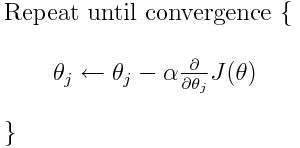

In [16]:
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACUCAMAAAAeTeTrAAAAilBMVEX////+/v77+/sAAAD4+Ph3d3d2dnb19fVzc3MEBARDQ0N6enru7u66urpwcHCZmZnd3d1nZ2cPDw9VVVXq6upISEisrKwyMjLLy8skJCSfn59oaGi2trbBwcFiYmLb29uIiIg/Pz+SkpKJiYklJSVaWlpQUFDQ0NCkpKQ4ODgdHR2vr68uLi4XFxcYWR6fAAAUXUlEQVR4nO1dCUPiPBPOJOmRpqWl3CCXByiu///vfXOkHMquoJ++6/v22VWENtdkrqSZQWkFSuN/hbD0App+8/trAPIDl9wICuQ+S38n9O7q9r4eh04dBsU9pQ7rMAoaQXJ93RrL6ffHrEFTc/THvjl9CZG/GcI9/TTr3dCkSv9ABSopy5OsmdU+xlnJhRwJTC1hMeqXTv46Wime/W39lMtchg7in3Z9b8xoMFj/WkeV/thMa+bI94tZ/h/u75ihVcvamGtb+wbQcDZuifNpj0bFIucMWLxcdespXDTo1wAaPwgh/ggNIq4J3r8xEVHNG/1+uW8GD2VgZGptIAiLjgaeXPzEbswQ1AVjfoOOUvkFDMlTk7K4gh77nAjX+Rs5i6Z14MjcJccfESM5ozWrqqGZaJ79a2vuKeLI9wsiE9kMXxMSRC6gI+rT3wYSwyzM4t5wARPLGLHfUCCP2Q+4Dnkt3PLefdRc5TRzMQkute7/Ss5CQSQx1G8dIiMfa1WagbAHaWJxnoKNZwMqJNXhE/mU/uc9R6J7RGOtciaJykHtC7GvkD+Z4MRYlFxEfEosVn9NAVYeQlSpoKEwW6bg+ajQBDRFtApmqqiaG46rhjCxIJ6lVEn8cyRSpFMzd5ZpjJNW+ve7itq0+jmLos4YqZfVWZXGs9GNOK3qcdDxiy1Jb+Vjn3lqqujtTJZl6aHC2JmUpN6gDlfj9ZMpirt000XilL2dw3tLpReOLr4iFnZ53JtFviT+hmIRx905zVM2MHEerdJsqNWgdmaN3XwyboRdeh500tlY2XLwYtRqxVaj6Hm/mEZljRSYdztRrwTsTWZ87lc+e2RqqHGn4zcl0amYpenD9GiyebrW51meOAvUshylljupVpNc2aLuY5HeboZ3FK6k2darX7lVRV0hh/RQo9veiGc0depUfHPjiXdy52kme2aKhFejLvWCxE58Yb7nNWfdmjG6rluvrS7vsYl8Vyrs1dhEK7w6NBVabdNjzhjhqPXdC07BDfZIQQ99ETDID8NJYlX8S/U9qLIeYyVPOC927PzKavXolvhb3dZj7EXXJ3QLMsooOmIk4uiBOatWjPNxJ9rUgbi2MCXx168ulooMkUx1XYFFC3NLb34tQE2ZL5aOzCfeZE+sKFjkLKKeYdMXmzukkk5fArHYJ7bg4tfEAqhMRF0c1Ur1zS3dXxJ9kAj3OU2XuUVL/sDTCDFJmilpep8WzM9DDY83Vo2wYluZIX42dsRU6tEskZfMjgRfmztFqpNah7qmW6gBpOERSSxOSXaesxxVYlFj5Wywetw/5ZGLoePYzt0YpJx+cBV5+b5WSWFWgLcid2AviLP0sSbUxrPeMSSniTesnTw7LqmBoMFc+oazkq670chZTyNAOa2I0pVZEPOamGeDXnCiHvHC8BEv90yfDHz0gn2JzVixYBhPWghn0+IkVzSHfYN8qV3E6zKT4u+uKWgoT79011RkjxOch/2kIXfu7rfnOcuIPl9gK/S+dnEa+ZRsp14Zy6rUveAdtYm9953MsEpMipXHHuHCksigj1gLQFgqMR1623Ga+LrjUKfa2IiuZ0q+Jha2EARaq5dgCcxLItTHF4svuHbdZcioRBGoTZr61FNXAWsi+bIwiag9s0LpqI2Po07qiWGtDI852mLtWkj7YqIoitNU+iqo0l3WP+9DGScGJHVrzbxu2BOiztFYNC3n2HE14iKw/Vl2s3KL00cfxLU99WXBxDxSF6NdQCedixFZkLAu7Guc4SxuxpKaJwYw7O/TR0QyT+YKkDnwnUfWz2P+2LHpJHOJTkiw0Slq0mReo94VQ9+s4RzPoGUbgO4S3ktsgFU0vL4XDKxlNvotZ/HN3hh2C14M2GbPJmYuQj5+0TSPjfsAW9RwyB6uQyUiKlccbWZgv4QrPCmoSNgFB4OlmTgFcdoZa4icpUPDxGS81jYvVJWwqrzopYvsXaW5q8Kldj8ZZEWfVqpaP1PHaxMIRQOkmcWRmfjoArXTuA9w6D9+Uq9fkYm8Ky1cw1zkcmpsZnhnQuFCUnsh5NB08d6FKbhMBWq0CepB4XoywiFCelwvDoqcLZIaqoNHHXGvSAy1J/ZhcVBRWGuJH78wc15g9HPVc0uaYbR9RGOhPpCsIPk396jeqX3UcbxPQuqNtSFRYKWKaJrz0HkoRJYlLetidq4ccf3GzFkmc7VwhXB6deJX6eyV6yC7MbQ2ZGF/NmauYK63JuYrXWJp01cJQNdssbWx6/B+zoJ4hrTcGKmRKrijOfXHCr72VGNJ+phGQTOnIxaJlUGy+CBZqMO8O7KiaovqnDjLz9HQsUNU0gQlxIbE9Dg5xJRDEw35/rnxvOOzQMLRvGpSvg9Ky1YZ6Gq3YM+5mLIYMjORrtRzsht4qYCqXvBir7g96r9Wv3EdtDO0pEXjMMLqAClx69CuQElsFJEZxFHfMpPeui0OdTpXevCUW8j900yhMiEzDZ2Dn6XVYkDs4ZEryHqyNUSdQvRdIg2QLYgrSQwhNVZ0E/vmauqoz2MS37LOQecvJTvUbEnYN+ObJ/fA84s9w1nU04IFI5e1+mpRFPNizO7SbY3lVeVpqw4VPBKlbyLLQ8GG9LKPrhg1oSt/5CeSsnnNWbznMNgZt1uzte3H9z7danKBF2lUEIFTs03TWW8eVh7Fpuv9Ddaap5n3cT5e99Dpg+dRGlXHO7BJihVEaBEG5fKpdrun8e3AuEmGrQyfOh5dmmxnTDYeo989ybbsulD9Vo8fFnEUsywW6HzPChpCNjFuXW6ziavXY9LKsWfJRfLOewsfz3E+cb2wy8Y0prI2xjhTs06sFjM07fjH4Jcx6+kcX+rNGO+abx7S5y11drno+mh1utkC9jWxWNyDO2nFnMnKKWlWWqRSNOsTHUrIfhdvq3IB2ywWjzYd7GFBqIOB3hscLXUlTZW6KdLUH35rUe+8moOwPABZ2QI0KluJ7QS6gy090a/zq6JO9W/r2O73GxNRirwk5B09C83SUFo8GQD9OTCv1oY2NCh+FrCxCJqMBJN1VuOPWODFtoUD7WyQHqrnZDeafCKxqGI+9xMiC/L94w1uQtlk/yhDs9qx8iCAnYWg+QMjKSazbnaxdag9LPpl/OjIUzUkX2FR3YyoobgQnFu13KZM7dHiEA5bNAfOYk8j3CfPeSCQPBE2IKeUXVDYt9WM3DZTrWXSTvWhfMS+sZIRy0MN/sf8okOze2YKHANNYRX2LLUO8xL4JNh8mR8gUJ2WrRS+eXkU8uqyBmj2sYUme4Iepjv0wMKrBy7whrOk4xC6ACDvRNbkgnCW3c+LDoPYs/B+N/+IViDP2LirzSMRsKHGsJMitNX7HZbAW43oiegGjg1bMgc22jtj+41DYTZ+ezvYsoWcT0rZ3YRmT6iZCR3+EHal4Tfc2zARdpWWW9cAyrUxk+j6rdN/CCLcSd93fIyLoOX7JX4DmpiqHiVWBVG6DDrsnP8IBE1ohZU+3m9mR1xQPXWK/OJCei/gPwZBc8r+/kcrYTsPR1J5ads/ilSEsEn8kYdUB+SkxnTwCC4jVjBKP4Zcpw+YPj7NYntsU+dlxBKz/HOIdSSE9jNzvLf/YiuvafwDDxL/Ocj8Nt7Nx6sRf1CcnMsqala3PwXQ/Iiq/QS1ZGUWRv9zCNCiRYsWLVq0aNGiRYsWLVq0aNGiRYsWLVq0aNGiRYu/FHDVsaVDMYAQPAv6osjXP0FbOZZmz1QDzbm45nG6BBfKCVXdnP//JoTztdeDjyDIKclPnXLRujk4eK4XzbFOeaRu5V44HCyFQyKAbwDwodOrqXV6lvLjj9fDcRULy1U6PHcUQ44Sw/7gURJOd9pQ8nuPcHx8nOG09Tnhua4irOC5zNX0of/24v4Qb3O64xDtLMc87OXnrj4LIdXlJwiPC4aT9J89yUTyDLs7DdrH564nzUl3HWKs9f6Id+DvD0jGxwD2wwd6SHy1+lxOFTkwbdWKkkkUkzNdsSHwQIiTx6COKAWqk3+etS/vbXPe+jrwaW/VBBN85gAVn/O2RZpGw/nbwG/YH66Ss/abSnEcgqgt0nWLwwn8rwbFdaWpv74gaVyUm9jrj6SP2EOcBl2OKJjc1+d4JPUPpo4euZW0lHnRMO6mvTGdl1/F36Cxwrl9nU21eirfXA5xP78tTdKR3SrolZcZI4lhaJSxDiELIJE2FKuKDZrNuZIUZueF+ZeT4EvAMEv0dsIhB5Ol/mJyhbO7Vnc8pdx500tgrf+n8+cWFg94W9y7yMnZh6HQiw3RO+G0J6jNhkabm7dzxpLuzY1EqSxK7lqixi9jCkWlsHNVzr7ez0JFgx0eTsgSxi9vrh7CTX6HIWUESPzLZVIYonN0U70K4U0cp+LuSAGV9VtjwcUmtfBhn6IpudhoRnPtVpo/7X+5zpIzlpOSRPFtfiJ9iJo6X9qq3YzGGkLw32/NBuKT7UpIR1txzEm91wXeYu9XZ9oDxXkZgBhr+hAqKs2SLlAgK9YymH5x5EjQM6XpE00G7twNfzZyUzMmeg+MvsyYAmeL44CHYN9scNFAeYr8X3TP1YM3le5OVja9jhZXfkK5mPTcdXhdmfY+uTa9ABTaOOnxTL3s3l7G3k3L33cimdwrGme9UxedMBd9Vc068SLitzmI4iIdbSPf6ZRwxmEiKnUlJQay3lyxpbg1U2LQlZnyPBVnev9/Bo1wbDgxzfZt/hFilyTLfy+GFC+uqYbBRStxzXp5OBnj64aSIqxUk4AhMJg9ryFxJu5rCcEDsxVnq2cqurVn5mw45l+dt0siTSMzGqwHWe2ic8OjBIy/RexGgyzLJia+bLlDTFQYopUuUOOMS4n5hX2QYrOJ8AZL0xPftDAhytHUGXXbmLBXY84nufj/gfV7hoYEX3ZuLBtUR0GNusrK0/tPI44ynl09Q80FEpUd9pdejVjvE2OpvO7y4NBFgKgJuW0iUsMCbx+JfAi2ZZVFdRaSVQlfKTeBzomI3CylQPhKyJrsfkKNVUYikCHuHW7omzdwxi32NLjf8ZjqiYzt2e3TgCYTd1Kokg06ynOwZeIoF1W8ZpDr4b9xLrx1pl6HBToRcmHGsowunMhryfmQSGVJeCy4+Zc7Wtpq1yOjd0etJpQP6CB3Vi0H7AEG8BrwSN60W9PkDynZE0WNb8vAEE3Y76GceOz40ehFagYTRzlIgG6IxudtF6sDhbSE9gbhRJVFpkCruUmYhz0l+FD6adIkcDPzL6YU/+ZEFMhfogv0qzs2NwfiwKsNUTApEWJxz+/Ez4EgRSf1aBsCmLG1BxAF5UaF2gdsJWG3h+qwIRJbvCk1pz4tUehEZG84WRJQ2irKIGJKNhqUGGj+1a4DTSClS9CU/ETvc47uL6OOGfUPHCLr/ENxR4JUmUdogo+1bTikif3mICUJdGTCUEYXXr4YNIc6cA63maiDnldh40qrtVnh53duqgP1SB7x0q0hNu+M2H5qyvX21bTiCXygBDOTGVDX88hnx7lkkArT2xPiJUe6Wz9EKH2bGY3D5lGcEWMke/485N9Stkn/qnucUEUlczK+NpiTahUPm1UP58HQzZaLNTt0e/PdKLC81pMbbn9OnLV129AtdTP54oU084qd9pSdZdLrCBntYFXgZMgqEOEgqVCOlLrdkHsEsMqVKdR+XwmOrWp4pEA/xQQ51VY+3Xm4qYSjHstclZuct4oWnanYxhCOmdGytfuLM5Iwyy4iVpBq9ww5JUfkNBwa/MNXb8Kz+rA+7noRgGWF8pgfX2/STgitXoU2ouaIUi/SCTdozXn73L5ZJ8J+O4Zc7YfYR2mltiMfB09jcofN+xTvw9VOvw6KT3wHZNiot2rEE6uYbqT28cZ3xyIb9LM5s1nxtcC+dAbXT5DwDcSZusiRP4Lce0eyTeuV5zrXwPx5th6e2oR3HU44ntgzfPp94Pw28fUL0vDkLkvhtTf6Tjm2kBqKTuSHcwN64hO0F/PmUeS5llQ+axyUo+u67F7b6U8DpQ7n9QOyz8lT2PN57TW8VxBvn1Ki9iJyqqR13lA2Ms7uOTKVql1IPnaAVZMKvj32G7v6gc108UMfTUibc0V5Gt9NTc4JOmDq4R5V4PqFJy29e/uMW4uW9eU+h7DAqrLzXY8Nj3vjNx8RfXY6owclauXyXhOVba/H0mUek3qGxNgs3nq/DdhXR0d5qU6TMFUkhN+chv5untRDfX2r2O8VFn08yRN9WTlU7eR1UpK7vjLobOWusiFT0zkNz0vyRDbDDkj7+iPHDz6FddR7/kibKDXZpvcY3l1RnjcaXgre2l7RxoFWUYqUyv1Zowz8sJAXkhaOFLwOF6/u+KfQ5Cq7vmBYKMN5I/a7UuzgdiiVYZc2XJDe2xE9eLjJq/pcN0RpSZLYE/4H++0q69shuw1pFHf5ccP4IU4T2TYtF//+0V8HLZvv4gjIEjwsIeFh+vd9b8g/jP3xqibDpQ7LT+X63+8L/OXQ8niJPYJwhlCoNdw0+34t9tAHx0zOLzB3jTqz5Y9LivbVkEUL5wkOC2fQzQr6A9/a9e8Gbx4EzQQQThzL8wf97R75X4/GPdOHByFN1tEflRKtRYsWLVq0aNGiRYsWLVq0aNGiRYsWLVq0aNGiRYsWPxPyoDIJYVLtKZQ/gwI2lqvNrIILA7z/w4AQhtZx/BXWLWf9EQ073e/aYxXvIXwXLajMSNKSFn+CiJ6l73n/XBK+fz84vpgO062d0q3Oeg/huG9mrg04+u8CMqN/1pf6/pPIDIe4/NPd+BFABd9qrIvRCQGOLd4HqN5T3h5hvRCUDW7xxYls/i2wqmei6kxwY4szSCmBUouLAJk5yUbU4k/ITKvdL0bmrgrs/k8DyINviXUZQDz4lloXARX8930Bxk/Hk2vXhpcCKGlz6zr8Gc1zw0jSUrb4I5rnhuM2xPhdNM8NKWVLi/fQZMZTtJhOWt76A/4H/Uiovq9EUcAAAAAASUVORK5CYII=", width=300, height=200)

In [9]:
Image(url= "https://miro.medium.com/max/1024/1*G1v2WBigWmNzoMuKOYQV_g.png", width=800, height=400)


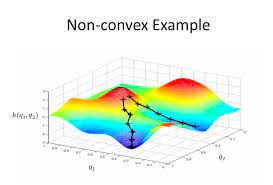

In [12]:
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUTEhMWFRUWFRcVFhUWFRUXGBgVFRUXFxYVFhoYICgjGholHRUWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGzElICUtLS0tLS41LS8vLS0vLS8tLS8tLS01Mi0tLS0tLS0tLS0tLS0tLS0uLS0tLS0tLS0tLf/AABEIALkBEQMBIgACEQEDEQH/xAAbAAEAAQUBAAAAAAAAAAAAAAAAAQIDBAUGB//EAD8QAAIBAgQDBgMFBgUEAwAAAAECAAMRBBIhMQVBUQYTImFxkRQygUJSobHBI1NictHwFTNDkuEHFrLCJIKi/8QAGgEBAAIDAQAAAAAAAAAAAAAAAAQFAgMGAf/EADURAAIBAgQEBAMHBAMAAAAAAAABAgMRBAUSITFBUWEGcYGRIrHwEzJSocHR4RQVQvEWI5L/2gAMAwEAAhEDEQA/APcYiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIBy/antQ2DxGHQ0w1F1qPXqXsaVNKlCl3luahq6luignlM1ONj4nFUqmVKeGo0KxqM1har3+YsToAoo3v5mWuKcLNXGUmemHofB4qjVvax758NZCNyGVH9pyNHsrjsmPouAw7rCUsNUZ1PxFPC1K1QJV5qSjJSYkam55wDteH9pcLWLLTq+JE7wqyVKbd3+8VXUFk/iW485TwztPg8Q4p0a6uzKXSwbK6i2bu2IyuVuAwUkrztNRUoYjF4lK5w1XDrRwuIpWqtRLVamI7qyqKTsMq90SWYjVhYbkU8O4NXWnwYNTscKgFfVf2Z+AqUjz1/aMB4b9doB1HEMdToU2q1XCItrsx01IAHmSSAANSSAJgf9z4XujWNWyhxSsyVFqd6QCKXdFc/eEEELluQb2tNbx7gNQUkak1XENSxNCv3VWoGLrRYkqhawDeLMLkC6LqJTxJ8TVbDYtcJVHw9aoTh2eh3z06lBqfepapkDBnIyl7lc3MgQDar2mwncnEGuq0lcU3Z7p3dRmVQlUMAaZu6/MBYEE6SMN2mwjglaw8NSnSYMroyvVIWkGVlBAYkZWIseRnO1+DYit39c0DTNfG4CoKDNTLilhatHPUqZWK5iqsbBj4UUb6TP4z2dfE1ccpGVK+Dw9OnUuNK9KpiXDAA3BRnpMD6W2gG9xfGKFI1BUqqhpU1q1M2gWm7MqsTtqUYAbm0xqXabCMjP3uUK6U3DpUpsjVWC086OoZAxIAYgA9Zyz8CxlbCVa9WkUxdXE4au1AVEzCng3p5aCVLlQSKbuvINV1tqZkVeHVKlLE5cJiTVr0qeFvjKlBl7tmqXYrTqN4aXeOx2LXst9wB2GHxlN3qIjZmpMFcC/hYqHCk7XysptyuOs0nD+KYuvWrimtBaVHEmgcxqZ2CrTZmFtAbPp6SexfDauFpVMNUUkU6rlK5YE4hap7zvamt+9DMytfcrcaGw1HD+EiljK9SrwxqzvizVpYoLg2yUylNVOZ6oqLlKsbBfSAdR/jmHsT3o0r/AAxFmzd+SAKeW176g7Wy+LbWWsP2iwz1hQWp+0JYLdKiq5S5YU3ZQlQgAkhSSADOebg2I/xH48URl70UDQutzSCGn8f81u+ucvXudNzaWMLg+IVMRhGxFOuWo4p6lZ2fDDDhTRxFNO4VDnK+NBdhms2tzewHQt2ywAbKcSgs1RGZswRXpZs9N3Iyo4yMcrEEgXAI1mRh+0eFelUqiqAlI5apZXQodCM6uAwBBBBtYg3Gk5//AAKv8HTp914xxT4hlun+T/iTVs5N7H9kQbb8rcpids8BUWnxeqU/Z1cLhlQkizNT70OLDUWzJuOfOAdH/wBz4epTr/D1VepSotVAIYXXKStRMwHeUyR863U9Yo9paKUMO+Ie1SrRSqVRKjmxVS75KYYqgLC7HQXFzNTisNisVXaqcK9AU8HicOA70SatWuaZATu2b9mvdfM2W5cab2xF4RiaNWjVNLEupwGHw7DDVaKvTq0C5KuKjKGVu90Kk2Km+hBgHdYautRFdGDI6hlZSCrKwuGBG4IN7y/NZ2fwK0MNSpIjU1RABTdlZkG+VipIJG2hI6TZwBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBLGKwyVEanURXRhZkYBlI6EHQiX4gCIiAIiIAiIgCIiAIiIAiIgCIiARERAEREAREQBERAEREAREhmtAJiU3J8pQgOup3MAuxLTMRbY3NvwJ/SVXPT2P9YBXEoFQeftJDjrAKoiIAiIgCIiAIiIAiIgCIiAJMiTAEREAREQCIiIAiIgCIiAIiUM4+sArkFhIsT5Sk2BHof0gE6ny/OQtgT9P1lVz6S2qgEk+Wp+sArzE7e5lKA668zKs3T3lNMHXXmeUAPfTbf05GV5vKUOTcac+vkZVm6g/n+UAopVBb6ny+0ZU9jb1/QyKLi2/M/mYqKLrpz/QwCrux6emkppg23O56dZVk8z7/wBZazZVJLAAE3J23O50gFwsRbY3Ppyv+kquen5Tn8Z2wwKMA2Jp6HXKWPIj7II/GZOD7TYOpYJiKZJ2BYBvY6zFTi9ro3ywteMdThJLrZ29zbd4JUDLdJxbfmfzMOASNOv6TI0F2JTk9feUpe2/uIBciWyxvawk5uoP5/lAK4kKb6yYAkyJMAREQBERAIiIgCImM6VM1wwC2AsVvrfU6W5ecAyZbaoBfnaWcFVNSmjn7Sq1hsMwBt57y5WICkDodB6QC5lPM+0pcgW9f0Mq1PlKHsLev6H3gFWp8vzlJsCPQ/pK7k+Us1aiobsbaHU/SeNpK7PG7bsu5jyH1MpVdTfXb9Zp8Zx0AHJaw3ZjYAddZwfaHto7E06LZjsXIAUfyAb8tTp6yDLMaWrTC8n24e5ng6VbGz0YWGu3F8Irzl+yb6JnoXFO0GHw4/a1UX+Zwo9ybTUYLtpTcnL3bi/+nVViPW1zPL6GAao3eVWLNzJZieegvsBv+kzcTgFtpcMNVIJWx/h13mTrzfYsqnhzEz2/qNL7QTj66nqfppfY9TTtJRNr3WxvzPIiZ1PjFBtn9w39J5VwLjrGy1vEtyoqDU3BykNrrqD5+s6ulSBFxqORFpCrZsqW0zmcZQzfL6uivGMovhJJ6Zeqez7NJ+m52NHEoR8w3PMdTIqVaYsbgWPl0PSc5hsMOcvYrDXFhtKqr4pSdoU0+7f6f6LDBwq1rOpaK7b/ALFnjna5aQK0FNV+pByA+Z3P96zzjjONxuJN6tQ5b3CjRRryUafXUzta3CvKY78L8prjnTrP/se3TkdjgJ4bCq9OK1fie7/j0PP04UQddR6SRwkg6E21v+g1I/v8O5PDPL8P7vKl4d5fhJixtN7Fo80fE5/gXFsdhwuRyV506lylthYcr+RE9C4J2np1iq1F7qpz+6SbbNy+s0dLhszKXChMlmUqW8Xt0ZT494bE3co2l+JbP16+u/c7bL5n8/zlNK9htNTwqs6DKx8PInl/xNrSJsNj+EuMDj6OMhqpvdcVzX1yfM5ipTcJWDMcw05HY+krzjz9jKWbxDQ7H9JXnHp66SaayKPyj0lcoo/KPSVwBJkSYAiIgCIiARERAEsN3mY2y5bC173vfX0Fpflli9zYKRYWuSNbm99Dyt+MAx+DL/8AHo3P+kn/AIiZNUgKR5HSYvBwfh6N9P2SbfyCUYvGKLqv1Mi4vGU8LTdSp6Lm30X1txY8yxxTiTL4adr8ydbennNOvE8SDfMD6qJssoPKT3KzhcRm2Orz1LVFclFtJe1r+b/IsKVXDwjayfd/XyMVuOVrfKvqAf1mtxWKqubkXPnf9JvDh1lJwqzypjsbJWm5MxnHA1H8cE+zbt7XscdjcI9TRy1vu3IX2mInA1H2RO7ODUyk4ITZRxsqfG/5lrRzKNOChTsorglsvZbHH0uGW5eh6TAwvDqrYqtTqNTZRTouU7s2Kuao08Rsb021N76aTvvhBOVxvFhhuJqr0KoSvQSn31kyZ6VZglzmsqn4i1zbV0FjfSwo5n9rqjDd2fnsYVse3Z35mtXsyMMWq0UDISWq0zbNYm+akzAWtoMl7EAWsfm6js1jaFVM1Gorrci19bqbHQ6ibeoF1BAPUEafUTQVez+EuzIndVSWPe0iadS7G9iyWzLf7LXGm0rYyeZNxd78nx27rr0a9nyq8XmUaUdLe3Q3TeUuLU85xtP42hWZ2qnE0SEBAVBW0FiwAsp87ZSeV9ptsLxelUXNTfMLgEEFWVjYZHU2KtqNCAZa0vDS02e7OZrZsqb1Re3b6v8AXmb7ODBRTymsp40dZfp4kGaK3hqS+7dGyh4hg+ZlHDCFwglta4lZryMskxMXfUyyWdQa4l6nh1EruBMRsRMfE4y28m0coqPaTZFxGdwjFu5mvVEnD8WCGzfL+U0NXGknTaWLk7kzpctySNJ6o7eRy+K8Sz1Xp/wd4lYHKw1BBsRr06S6Kg6zhcLjnpm6Nbym7wHH3qHKKJY8zmt76aS3qYOpFXW69vmWuC8R4avaNROMnys2n5Wu/de5v6Pyj0lctUD4RpbTaXZEOhEmRJgCIiAJreLYWo+TumClGL3Nt8jIBqp+/f8A+omyiAaK2IVltcA1apc7m2Z3Qnwm6lFRBY6ZrbgWrx1TEvSBpg02JAOxNnpfMAVPy1GFwRtTPIzcxANXTd3qI2UrldwxKst6WUgAhuZcqRa+i8r2mY1R8xGS62FjmFyelj/ekyJYNQ3IyEgAa6a3JuBc8rD3gGrweGeph6XjKjuk0yj7g3tMevw2omuhE2vBr/D0eX7JP/ATJqCwPod5X4jK8PXnrknq63fye3saKmHjPrc5lcRbeXPih1m04lwxKw+633h/eonJY/DtRNnHoesl4PKaMlp5nM5lWxuCd7Xj+JfquXr6G5+KHWUDGjrObfGi8g4wSx/sVJlQ85xXFI6f4sdZWMUJy64tTLy1xyMjVfD1JmcfEGIjxidKMRLeKVaiMjqGVlKsCAQVYWIIIII8jNGtY9ZY4riMQaLrQamtUq2UuCRcqbWsRY356+kranhtcUifh/EbnJRlt3fAxuwnC6lNKrtiatWnUqt3K1CjE00C00qs1rksKY52tY2uZ0GJwdxvNJ2V4gThaakKGpAUWRFKhHo2RqdixOhXQ8xY6Xm2ONmuWQzdX7eF03zX1Z9+pnjM2w9Ryp1bPkY74Rl8/Sc/x/gVOuVcu9OopS1WmxVrK4a3Q+VwbGdQccItn2Qn03Hry95Zf1VfCUr4lJxXN/D+fC/TYqqOFp1atsFKWrorvb05db7dTk1xVfDizj4iko+ZDauANy6ucr9SVK+Sy/w3tPhqr5UqgPfRX8DN4QbhWs2mo2+yZssbwvE6lMNmB5htfamw/WWMP2Rq1lLVcNSIYhitT5msAAcrabKBrbaSqObYetZRjLfrHb0d1t5ouP8AiOJ+xlWqygn2mm//ADBTu+0X6GYuJts0ufFn705/i/ZGsgvSxD0blb02JanowOmfMVt0WwmJU+OpDxIuJH3qN0f6I2h/3CTqc8PUe6a7tNL0ulf0KKrl8qW0ayv0vpfbZnWfEsectliefnOPwPaVXYrkqqQBpUpuDc3vfTTlqTY3mzp8SkyODhJXiiNWwmJh9+5u8s3HDuBM4DOSqnUWFyfbaY/ZfBNUtWdfD9kc287HkJ2CPYC4I+l/yvKvEzVKWiHFcf2L7JcgjOP22JW3+Mevd9ui58XyNfS4TQUjwcjuT5cjpNiqKAAAAOQ0tINVcw1Gx5+kuZR0EhSlKX3nc66jh6VHalFR8kl8iKPyj0lcoo/KPSVzE3CTIkwBERAEREAiIiAJjNibMVytoAbhSRqbWHX6TJmNUxqKSGuLC5NjYC9oBZ4Pf4ejb90m/wDIOUyqqDKb66Hf0mDwrEqKNFcwDd2gsxym4UXFjrNhk66/lAJz9JYxWFSopWoAynl+suZRyH6QU6n+kJ23R40mrPgcPxfsO5JOGqgX+y9xb0cXuPK31mhfshxIf6asL30qr+FyJ6tmPKx/ASdeYv7WlnSzbEQVnZ+a391YrJ5PhZcFby/m55TR7McQ/dn6VEP/ALSjFYXEUP8ANRlHUg5f9209YFUcr+xA95BUMCDZhsRyt0PWZ/3io38UFbtdfqyJU8P0JL4ZNez/AEXzPJqGLJmcuIA58/79Jsu1fZIgGrhFva5aiPe9Pz/h9uk4PDY0nyNzvpY9Pl02Ol5a0fs8TDXTfmua8yLRyKMH8aV+pdxJxC8RU02pCm9FmqKc+XwtSBdtdahApqD0Sb+pi7bGcOuIxHxjE1KeTul+ydVDsQNW0fxHU6ajSZ74+7hL6kgWGpsTso1ux6dYw2G1N+b4m/GZTRlBOSWytst/3b5JHZcPr5jc/KOvMzteG4I2DVFy/dQch5marstwRkVXqrYj5KQscv8AE55v5cvXbqQ3U28tpzGY0aFbEKb+LTw/CvJcG3zk/JbIzyXLqlCDlUWm/wDjz7an25R4J7u74O8USoa/8QCOX4SMl9/w/rNZfghentMStwuk2rIL9RoffeZVgNBf0H/MnK3X+/WepuPDYxnFTVpK677nL8S7EYWqb+JWItdTdtNtTckeswsB/wBOqSVAz1alRQb5DlAP8xA28hadoGtpb2P5wWPO49NZKjj8TGOlTdvr1IywOGXCC9tvbgUoFUABbACwAHIbDTlK89+dvzll8XTUhbgsdlBux+nL1MnI7bnKOg1b6nYeg95EJZVUdV33PLcn6bmWxSLbDux5fN+Gg/GQ+CABNKyObeK1yf5r7/WX6KsL5je7EjyHIQCwKToVCaprmzG5HS3P89hMyIgCTIkwBERAEREAiIiAJaandgbna1uW4INuot+MuxAMPGiobBFRlIbNm628GnS+8opYFAMzKFawLZCwAIGuXLbnfzmfEA1VCuH8NJ3By5hmAYWzZdSQSfS/1mRd1+Z6bb2BBTbc7n8pmyxVw6OQWFyAQN9mFj7iAWRiX/dkj7yspB9M2Un6aSTikGr5ltuWVgo+tsv4zKI0sNNPaYuGwrKbtULjKBYjS4JOb11t9IBcTEq3yMp+olw0wdW1mNj1Y2ApLUFm+a2hA8I16mRSwagZjmXQEqHYKthqAqm3WAZOUcr+5AnKdrOw1LF3qI/dV7f5gUFW/nUWv63v67TeUcQX0pVCTlDWdQQFJK30AJ1U6X+usyCag+Yo3PcpoOdvFNlOrOlLVB2YPF6P/SbiZrlmxdAIQBn8TmwN7KpQAfQjfcz0bsp2Hw+C8djVrc61SxI65FGiD01POdF8U37ptOYsR9Nbn2k/EpuxIt99WQf/AKAm2WMryi46tnxtz+uh5pRe70cv6fnJAvufbaRTrBvlIYdQbj3kmmOcjHosOQkd35n0B/rFvu3/AE/GCh5m/wBIAudhb2k2bn+Blj4sn5Fz+YNl/wBx09rzHfEJe1V7G6rkAIALbA2vm97eUAyKmMVdAGY9FUtY+ZGgkC7GzOBv4UbpuC2+nlaZSoALAWHQSxTwVNWzBQGuTfXdrZvew9oBX8OuUqBYG+2m/P185bw2FCG4Zj4VXU3AC3tYcj4jf6dJlTVY3iTU6ypl8GXOzH7oWoWsSQBlK073/ecragbWJboVMyq1iLgGxtcXF7G3OXIAiIgCTIkwBERAEREAiIiAIiIAiIgCIiAJhUeJUncoG8QNtdMxzVFIXqQaNTT+AnbWZswhw+mHzqMpzZzawu1mBJ9c7fU3gGbERAExsRg0c3YXNiu5Gh3GnqfeZMQC2V8NhppYc7aaSxQoP/qMHFhplA8Vyb+xA+ky4gGDi0JbSirjKSGJUeIXsvUctfOVpgwL2Z/LxEgeQBuJlxAMB3fMUp1AWFrh12B81t1GnnJSiSQKvjJudP8ALFrfZ666XvsdZm25yYAlHdre9hfTWw5bSuIAiIgCQyg7yYgACIiAIiIAkyJMAREQBERAIiTEAiJMQCIkxAIiTEAiJMQCIkxAIiTEAiJMQCIkxAIiTEAiJMQCIkxAIiTEAiJMQCIkxAIkxEAREQD/2Q==", width=400, height=200)

# Types of Gradient Descent

**Batch Gradient Descent:** This is a type of gradient descent which processes all the training examples for each iteration of gradient descent. But if the number of training examples is large, then batch gradient descent is computationally very expensive. Hence if the number of training examples is large, then batch gradient descent is not preferred. Instead, we prefer to use stochastic gradient descent or mini-batch gradient descent.

**Stochastic Gradient Descent:** This is a type of gradient descent which processes 1 training example per iteration. Hence, the parameters are being updated even after one iteration in which only a single example has been processed. Hence this is quite faster than batch gradient descent. But again, when the number of training examples is large, even then it processes only one example which can be additional overhead for the system as the number of iterations will be quite large.

**Mini Batch gradient descent:** This is a type of gradient descent which works faster than both batch gradient descent and stochastic gradient descent. Here b examples where b<m are processed per iteration. So even if the number of training examples is large, it is processed in batches of b training examples in one go. Thus, it works for larger training examples and that too with lesser number of iterations.

In [14]:
Image(url= "https://miro.medium.com/max/908/1*FXHp55rpDM0tkaD5oz3Dvg.png", width=800, height=400)

# Bias Variance Tradeoff (Underftting vs Overfitting)

https://www.geeksforgeeks.org/ml-bias-variance-trade-off/

**Bias** is the simplifying assumptions made by the model to make the target function easier to approximate. **Variance** is the amount that the estimate of the target function will change given different training data. Trade-off is tension between the error introduced by the bias and the variance.

# Regularization

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don't take extreme values.